In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
import sympy as sm

In [122]:
A, Z = sm.symbols('A, Z')

In [123]:
E = sm.symbols('E', cls=sm.Function)

In [124]:
E = -34.38 + 15.32/(A**(sm.Rational(1,3))) + 2.856*Z/(A**(sm.Rational(1,3)))*(1 - (Z/(3*A))) - 93.15*(1- (2*Z/A))**2
E

-93.15*(1 - 2*Z/A)**2 - 34.38 + 2.856*Z*(1 - Z/(3*A))/A**(1/3) + 15.32/A**(1/3)

In [125]:
e = sm.lambdify([A,Z],E)

In [126]:
a_ = np.linspace(1,199,200).astype(int)
z_ = np.linspace(1,199,200).astype(int)
e_ = np.zeros((len(a_),len(z_))).astype(int)

aa, zz = np.meshgrid(a_, z_, sparse=True)

for a in range(len(a_)):
    for z in range(len(z_)):
        e_[a,z] = e(aa[0,a],zz[z,0])

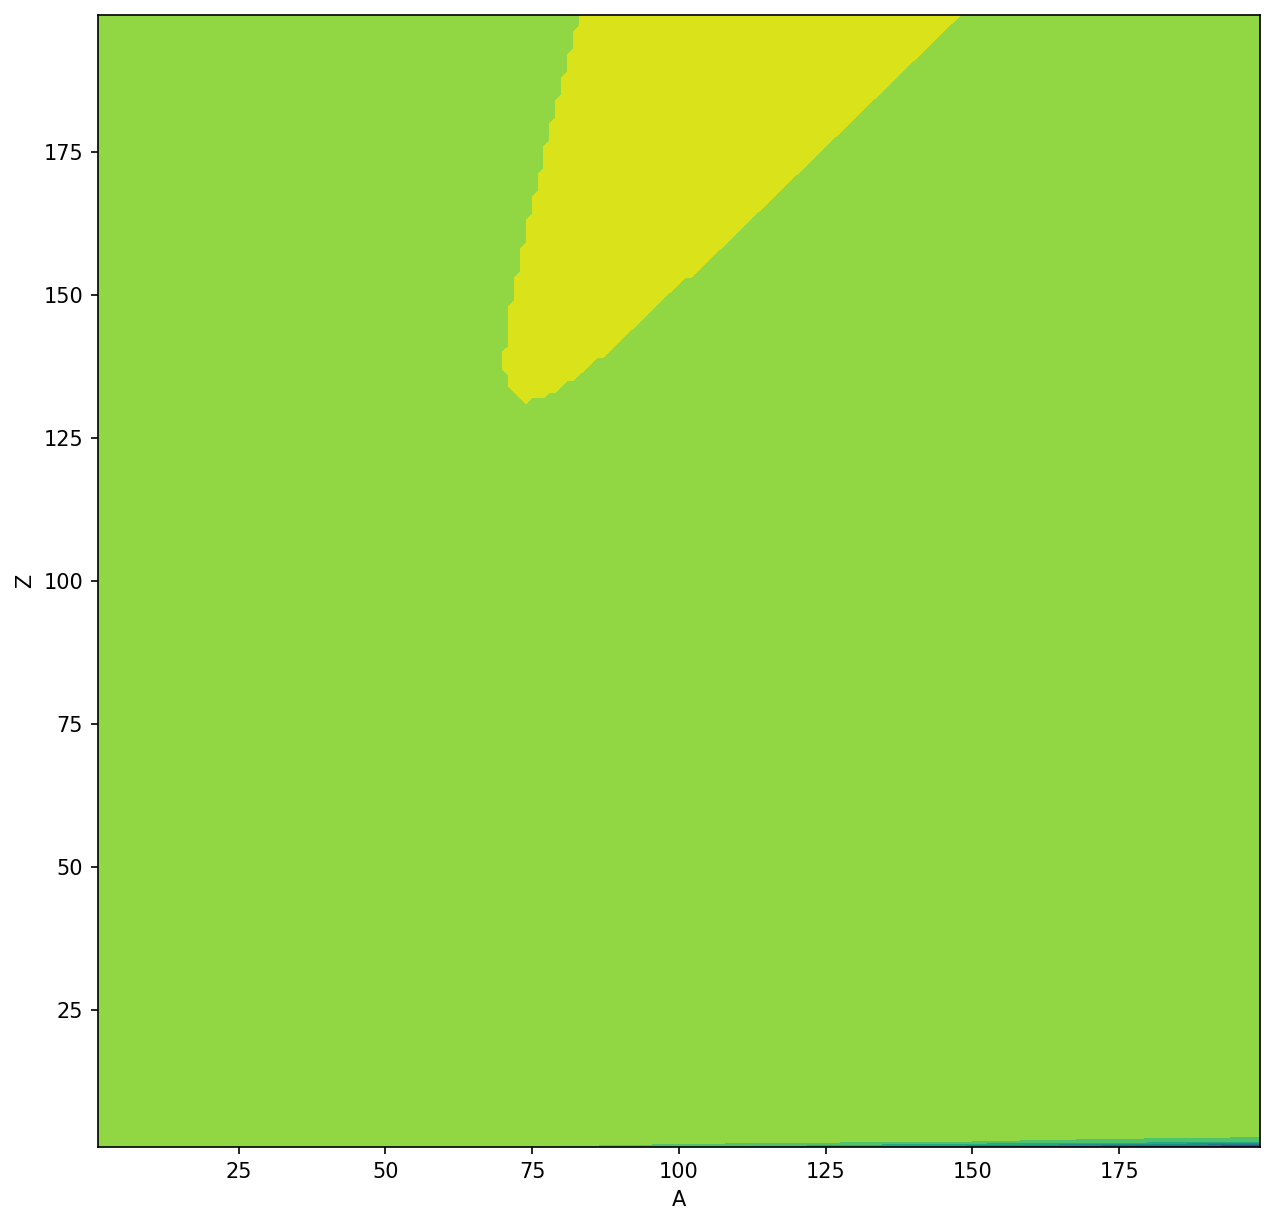

In [127]:
fig = plt.figure(figsize=(10,10),dpi=150)
h = plt.contourf(a_,z_,e_)
plt.xlabel('A')
plt.ylabel('Z')
plt.show()

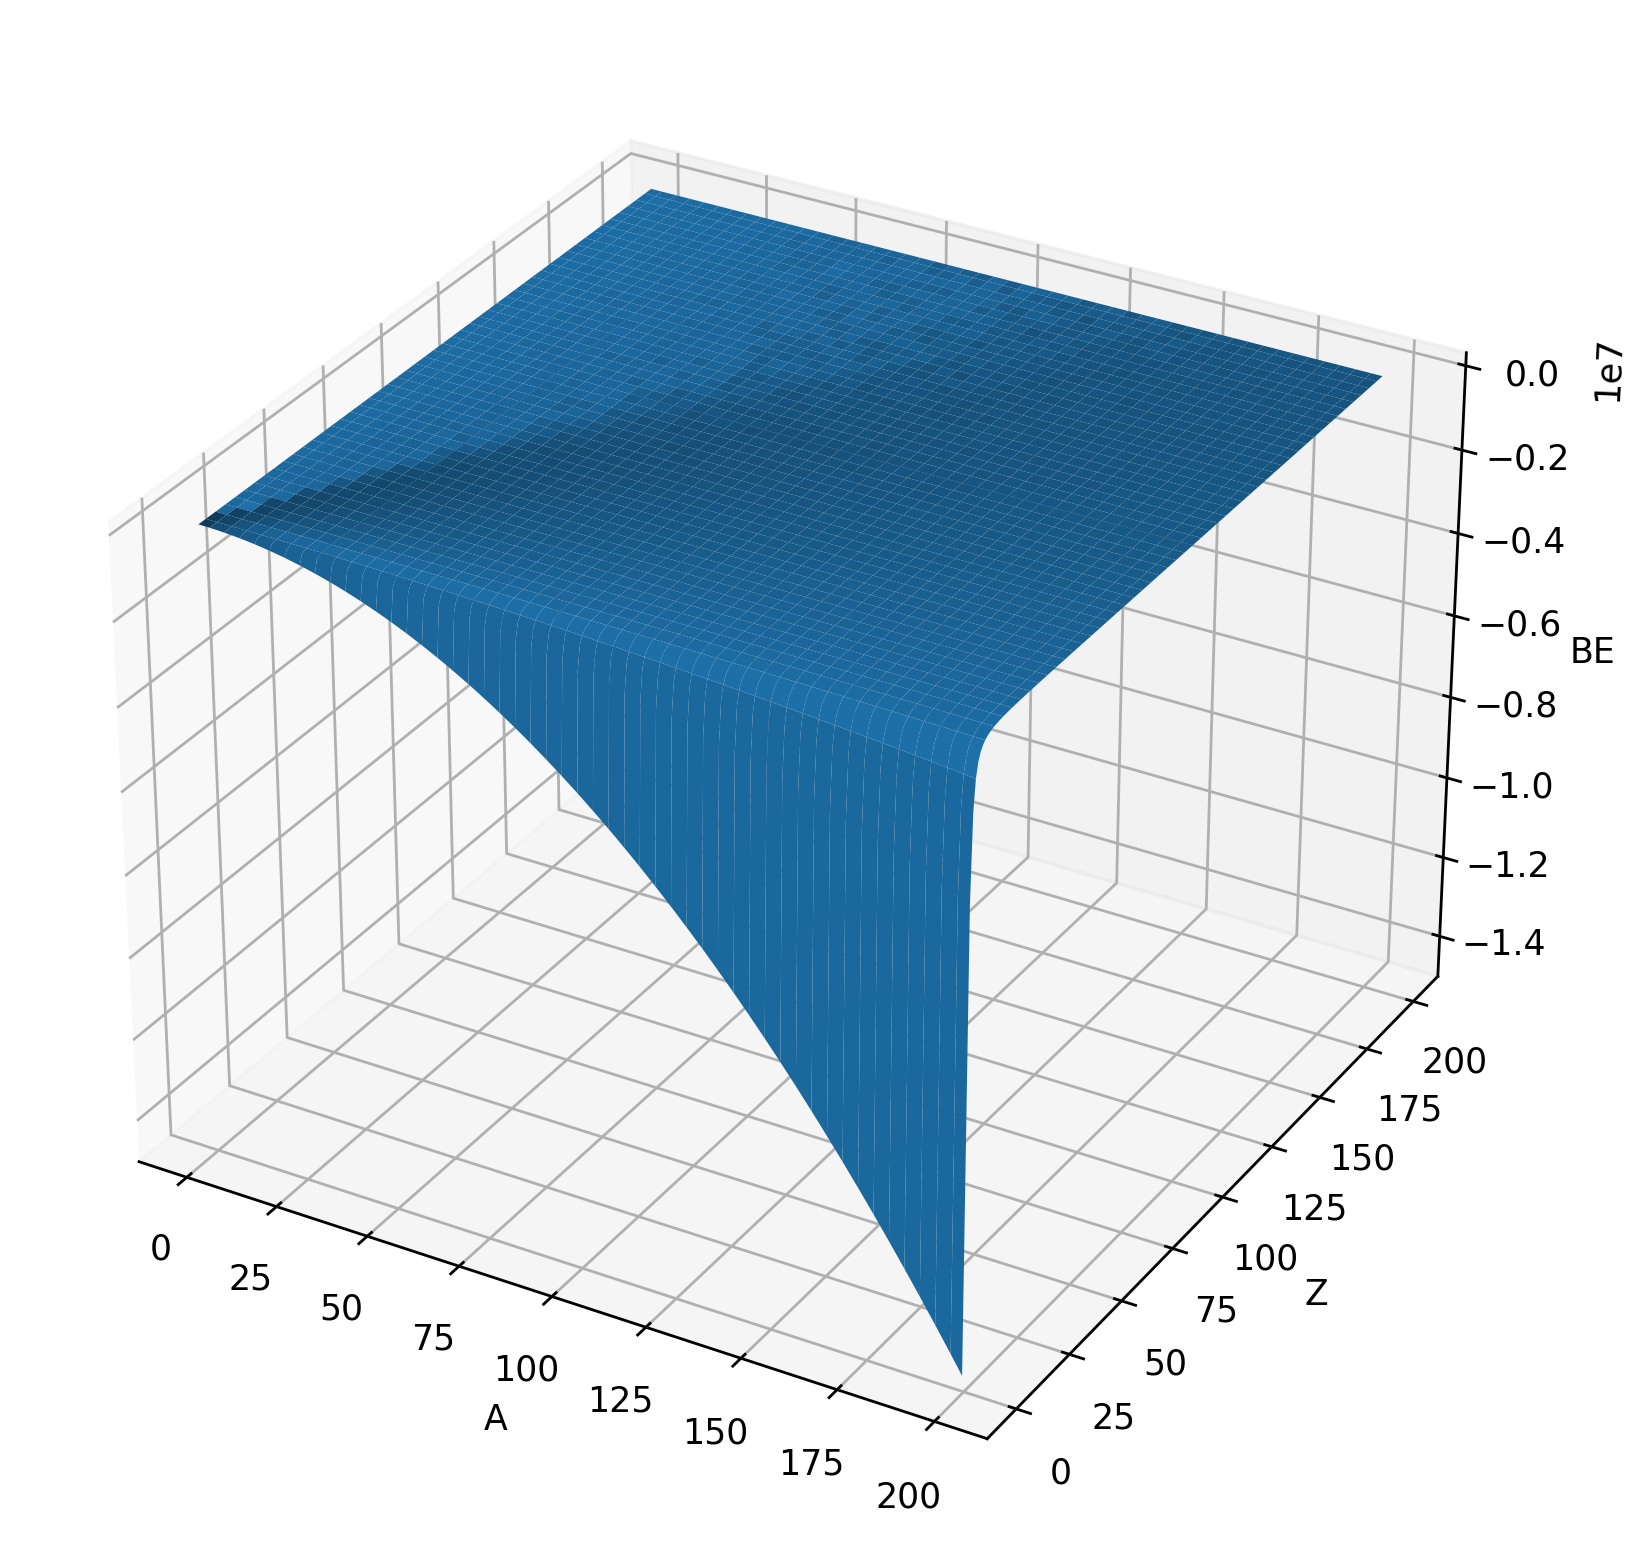

In [128]:
fig = plt.figure(figsize=(8,8),dpi=250)
ax = fig.add_subplot(projection='3d')

ax.plot_surface(aa, zz, e_)

ax.set_xlabel('A')
ax.set_ylabel('Z')
ax.set_zlabel('BE')
plt.show()

***
## Binding Energy

In [129]:
ac, av, ass, aa = sm.symbols('a_c, a_v, a_s, a_a' )
N,A, Z = sm.symbols('N,A, Z')
mp, me, mn = sm.symbols('m_p, m_e, m_n')
delta = sm.symbols('delta')

In [130]:
BE = sm.symbols('BE', cls=sm.Function)

In [131]:
BE = -av*A + ass*sm.Pow(A,sm.Rational(2,3)) + ac*sm.Pow(A,sm.Rational(-1,3))*Z**2 + aa*sm.Pow(N-Z,2)/(4*A) + delta*sm.Pow(A,sm.Rational(-1,2))

In [132]:
BE

A**(2/3)*a_s - A*a_v + a_a*(N - Z)**2/(4*A) + delta/sqrt(A) + Z**2*a_c/A**(1/3)

In [133]:
def cal(A):
    Z = A/2
    av = 15.67
    ass = 17.23
    ac = 0.714
    aa = 93.15

    N = A - Z
    if Z%2 == 0 and N%2 == 0:
        delta = -11.2
    elif Z%2 == 1 and N%2 == 1:
        delta = 11.2
    else:
        delta = 0
    
    

    return -((-av*A + ass*sm.Pow(A,sm.Rational(2,3)) + ac*sm.Pow(A,sm.Rational(-1,3))*Z**2 + aa*sm.Pow(N-Z,2)/(4*A) + delta*sm.Pow(A,sm.Rational(-1,2)))/A).evalf()

In [134]:
cal(4)

5.76598834034320

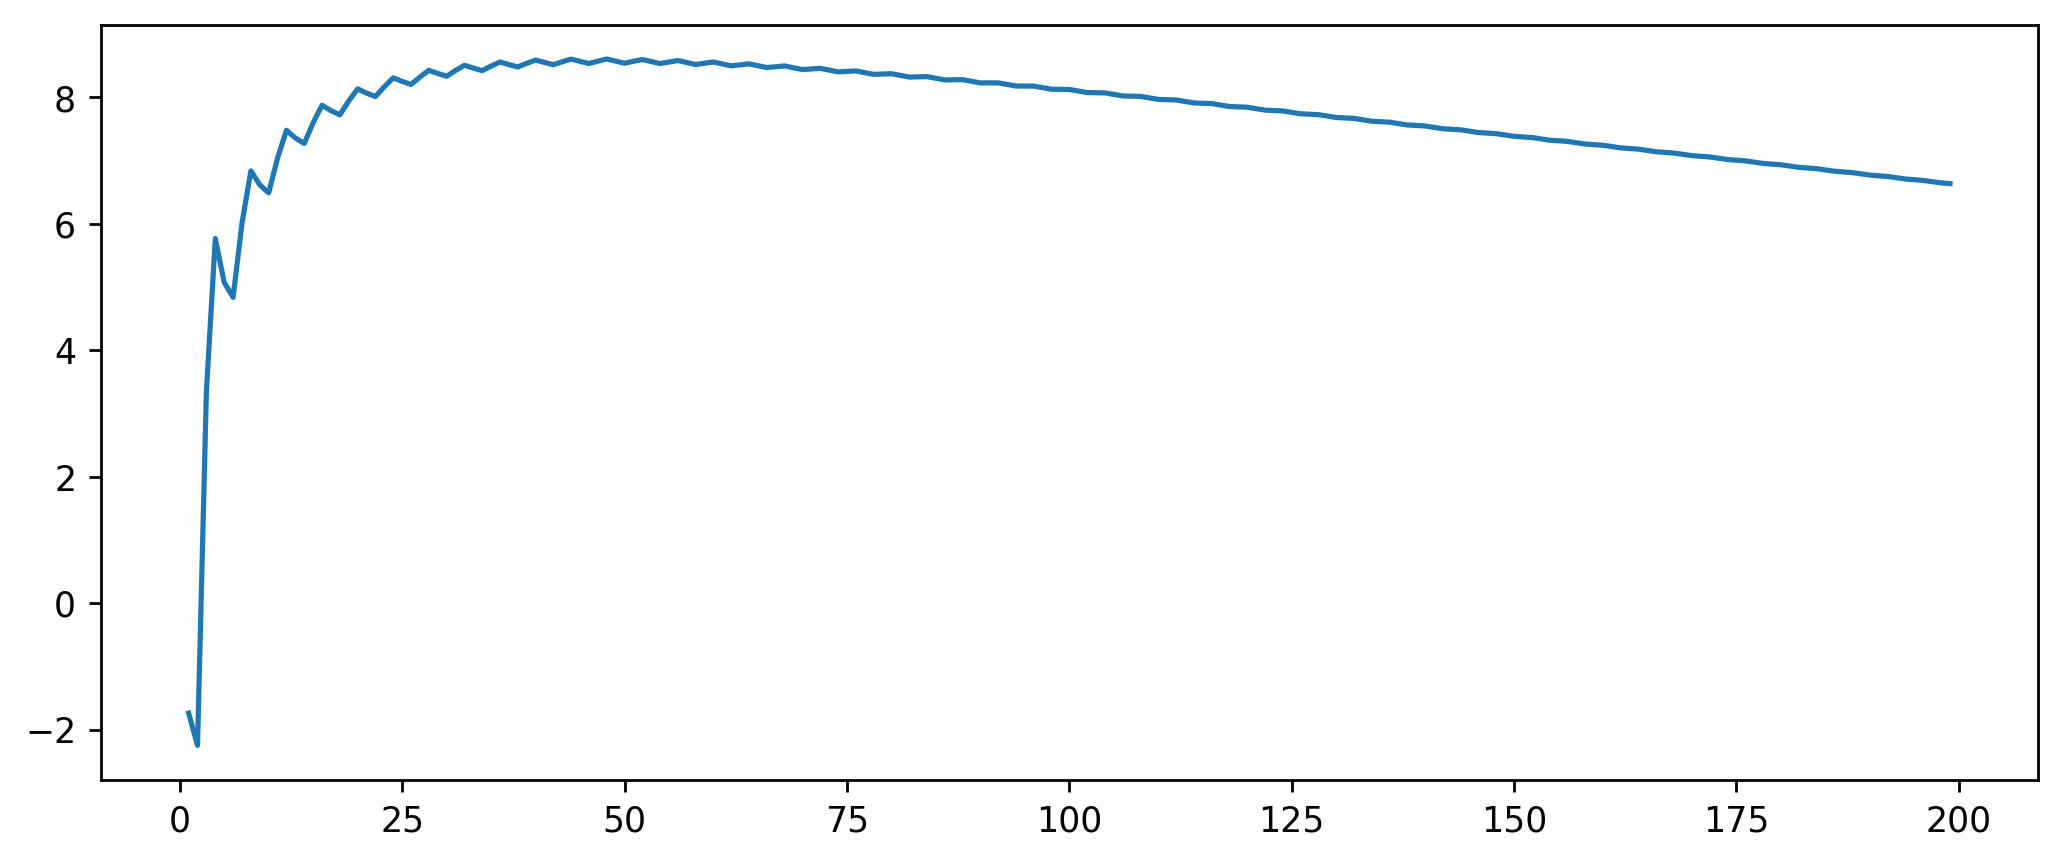

In [135]:
plt.figure(figsize=(10,4),dpi=250)
plt.plot(range(1,200),[cal(i) for i in range(1,200)]);

In [136]:
import plotly.graph_objects as go
import numpy as np

x = np.linspace(1,200,200).astype(dtype=np.float32)
y = [cal(i) for i in x]
y= np.array(y).astype(dtype=np.float32)

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y,
                    mode='lines',
                    name='lines'))



fig.update_layout(title='Binding Energy per Nuclueon vs A',
                   xaxis_title='A',
                   yaxis_title='BE/A')


fig.show()